## DA_Fall21_HW_2 
### Due Date: 11/11 before Mid-night
### Linear Regression and Logistisc Regression 

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Part 1 of this HW is on building a Linear Regression model using housing data and a Logistic Regression model.

### Part 1: Build a Linear Regression model to predict house price

#### First load the data set

In [156]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


***Follow the standard way of building a model and in particular,***
1. Use Scatter plots and correlation to identify the most important variable that can explain the house price.
2. Build a one-factor Linear Regression model using that variable
3. Print out the model performance metrics (MSE, R-square).
4. Plot your best-fitted line on top of the data.
5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.
6. Add one addition variable to build a 2-factors model. Explain your reason why you choose that variable.

***Part 1: Type your code and answers here***

1)

<AxesSubplot:xlabel='Income', ylabel='Price'>

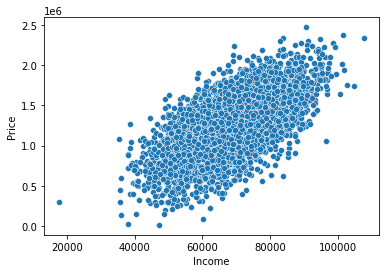

In [157]:
sns.scatterplot(x = 'Income', y = 'Price', data = housing)

2)

In [158]:
x = housing['Income'].values
type(x)

numpy.ndarray

In [159]:
Xarray = housing['Income'].values
Yarray = housing['Price'].values

In [160]:
Xarray

array([79545.45857, 79248.64245, 61287.06718, ..., 63390.68689,
       68001.33124, 65510.5818 ])

In [161]:
X = Xarray.reshape(-1, 1)
X

array([[79545.45857],
       [79248.64245],
       [61287.06718],
       ...,
       [63390.68689],
       [68001.33124],
       [65510.5818 ]])

In [162]:
Y = Yarray.reshape(-1, 1)
Y

array([[1059033.558],
       [1505890.915],
       [1058987.988],
       ...,
       [1030729.583],
       [1198656.872],
       [1298950.48 ]])

In [163]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X, Y)

LinearRegression()

In [164]:
print(model1.intercept_)
print(model1.coef_)

[-221579.47822252]
[[21.19548317]]


In [165]:
Y_pred = model1.predict(X)
Y_pred

array([[1464424.95032392],
       [1458133.78924722],
       [1077429.52286549],
       ...,
       [1122016.75902953],
       [1219741.59376302],
       [1166948.9559213 ]])

4)

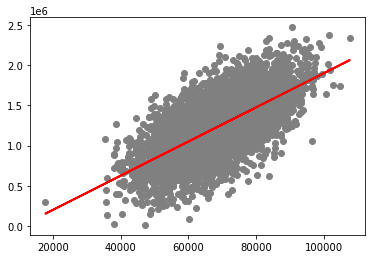

In [166]:
plt.scatter(X, Y,  color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

In [167]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [168]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(0.8 * housing.shape[0])
print(0.2 * housing.shape[0])

(4000, 1)
(1000, 1)
(4000, 1)
(1000, 1)
4000.0
1000.0


In [169]:
model2 = LinearRegression()
model2.fit(X_train, Y_train)
print(model2.intercept_)
print(model2.coef_)

[-224617.80110797]
[[21.24368249]]


In [170]:
Y_pred = model2.predict(X_test)

3)

In [171]:
from sklearn import metrics

In [172]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Squared Error: 74084394120.77266
R-squared: 0.4006059806785851


5)

In [173]:
import random
for i in range(10):
    print(random.randint(1, 1000))

158
961
112
73
654
246
987
558
266
141


In [174]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.452661
1,1,0.421126
2,2,0.417179
3,3,0.411293
4,4,0.426381
5,5,0.416008
6,6,0.458822
7,7,0.378152
8,8,0.433617
9,9,0.390990


<AxesSubplot:xlabel='trial'>

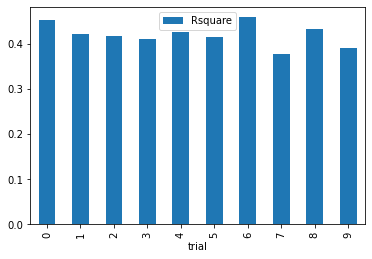

In [175]:
rdf.plot.bar(x='trial', y='Rsquare')

In [176]:
print(rdf['Rsquare'].mean())

0.42062282689315866


The model passes the 10-fold cross validation test because each of the Rsquares in the trials (as well as the mean) are close to the original one from the model.

6)

<AxesSubplot:xlabel='HouseAge', ylabel='Price'>

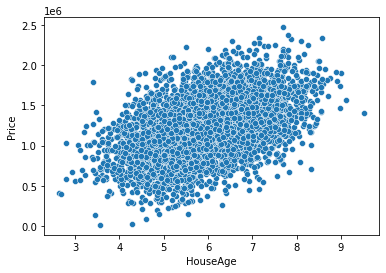

In [177]:
sns.scatterplot(x = 'HouseAge', y = 'Price', data = housing)

In [178]:
X = housing[['Income','HouseAge']].values.reshape(-1, 2)
Y = housing['Price'].values.reshape(-1, 1)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4000, 2) (1000, 2)
(4000, 1) (1000, 1)


In [179]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(model.coef_)
print(model.intercept_)

[[2.12204386e+01 1.60427782e+05]]
[-1181216.65021218]


In [180]:
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

R-squared: 0.6111416177920193


I picked HouseAge as the second variable because it seems to have the second highest correlation shown in the scatterplot.

### Part 2: Build a Logistic Regression model using the affairs data from
https://www.statsmodels.org/dev/datasets/generated/fair.html

The goal of this part of the HW is to see if one can predict
whether a woman on given certain attributeds, such as age, years married, number of children etc, will particpate
in an affair or not


#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

In [181]:
# Load the dataset
df = pd.read_csv("affairs2.csv")
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666


Now, create a new column called 'had_affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [182]:
# has_affair
def has_affair(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['had_affair'] = df['affairs'].apply(has_affair)

In [183]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666,1


In [184]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
6466,5.0,32.0,13.0,2.0,3.0,17.0,occ4,3.0,0.0,0
6467,4.0,32.0,13.0,1.0,1.0,16.0,occ5,5.0,0.0,0
6468,5.0,22.0,2.5,0.0,2.0,14.0,occ3,1.0,0.0,0
6469,5.0,32.0,6.0,1.0,3.0,14.0,occ3,4.0,0.0,0
6470,4.0,22.0,2.5,0.0,2.0,16.0,occ2,4.0,0.0,0


In [185]:
# Now we can drop the original affairs variable
df.drop(['affairs'], inplace=True, axis=1)

In [186]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,1


### let's group by has or no affairs rows

In [187]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb
had_affair,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.833758
1,3.619555,30.537019,10.770389,1.686515,2.290547,13.876274,3.796108


So, one can see older woman who has married longer will have higher chance of having an affairs

We can also use Factorplot to see the effect from age

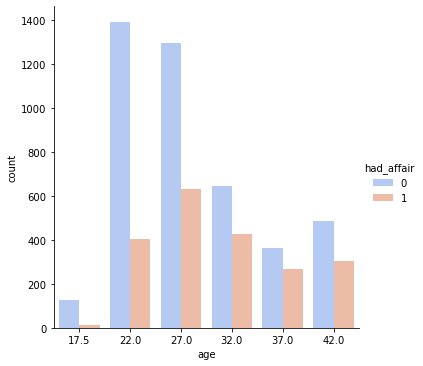

In [188]:
# Use Factorplot for age
sns.factorplot('age', kind='count', hue='had_affair', data=df,palette='coolwarm')

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that the older the woman, the higher the probability of having an affair

***Follow the standard proper way of building a model and in particular,***

1. Use the season heatmap to find if there are missing values. You can just drop those rows if there are not too many of them
2. Use the factorplot to comment on whether number of children and number of years of marriage is important or not
3. Build Logistic Regression model with all the numerical variables.
4. Print out the model performance metrics (precision/recall)
5. Do a countplot on the categorical variables
6. Call the get_dummies method to create the dummies variables for the categorical variables
7. Build another Logistic Regression model that include these dummies variabes.
8. Comment on your results based on the performance metrics

***Part 2: Type your code and answers here***

1)

In [189]:
train_df = df.sample(int(df.shape[0] * 0.8))
print(train_df.shape)
train_df.head()

(5176, 9)


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,had_affair
2873,3.0,42.0,23.0,3.0,3.0,12.0,occ3,3.0,0
1505,5.0,32.0,13.0,1.0,1.0,14.0,occ4,4.0,1
999,5.0,37.0,23.0,3.0,1.0,12.0,occ3,5.0,1
4390,5.0,27.0,2.5,0.0,2.0,16.0,occ4,2.0,0
1772,4.0,32.0,16.5,3.0,1.0,16.0,occ4,5.0,1


In [190]:
testing_rows = [idx for idx in df.index if idx not in train_df.index]
len(testing_rows)

1295

In [191]:
test_df = df.iloc[testing_rows, :]
print(test_df.shape)
test_df.head()

(1295, 9)


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,had_affair
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,1
15,3.0,NaN,2.5,0.0,2.0,12.0,occ3,3.0,1
17,2.0,27.0,6.0,2.0,1.0,16.0,occ3,5.0,1
19,3.0,37.0,16.5,5.5,1.0,12.0,occ2,3.0,1
20,5.0,27.0,6.0,0.0,2.0,14.0,occ3,2.0,1


1)

<AxesSubplot:>

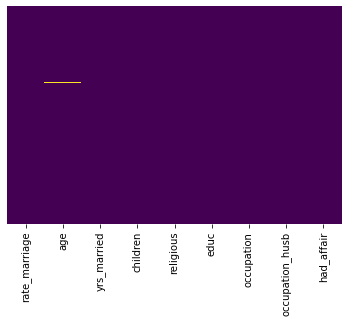

In [192]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [193]:
train_df = train_df[df['age'].notna()]

<AxesSubplot:>

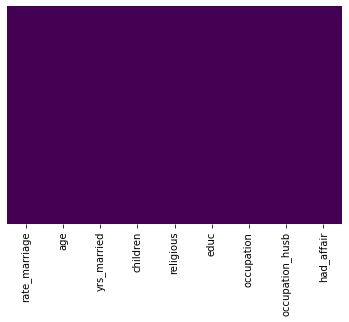

In [194]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

2)

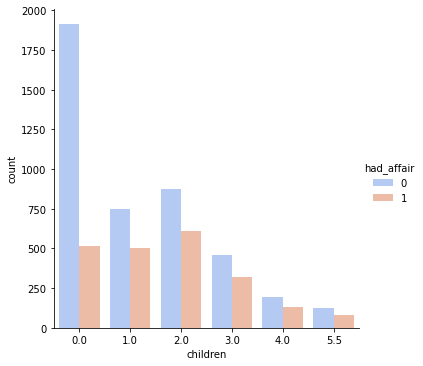

In [195]:
sns.factorplot('children', kind='count', hue='had_affair', data=df,palette='coolwarm')

The number of children is important

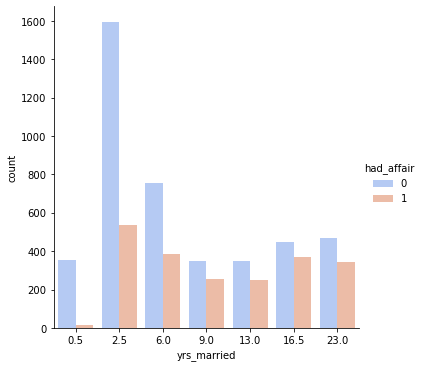

In [196]:
sns.factorplot('yrs_married', kind='count', hue='had_affair', data=df,palette='coolwarm')

yrs_married does not seem important in aspect of whether or not the women will have an affair, however, it is important to note that a large number of affairs occur at the 2.5 year mark

3)

In [211]:
train = train_df[['age', 'yrs_married', 'children', 'had_affair']]
train.head()

,age,yrs_married,children,had_affair
2873,42.0,23.0,3.0,0
1505,32.0,13.0,1.0,1
999,37.0,23.0,3.0,1
4390,27.0,2.5,0.0,0
1772,32.0,16.5,3.0,1


In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('had_affair',axis=1), 
                                                    train['had_affair'], test_size=0.20, 
                                                    random_state=101)

In [214]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [215]:
predictions = model.predict(X_test)

4)

In [216]:
from sklearn.metrics import classification_report, accuracy_score

In [217]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       712
           1       0.36      0.09      0.14       307

    accuracy                           0.68      1019
   macro avg       0.53      0.51      0.47      1019
weighted avg       0.60      0.68      0.60      1019

0.677134445534838


5)

<AxesSubplot:xlabel='had_affair', ylabel='count'>

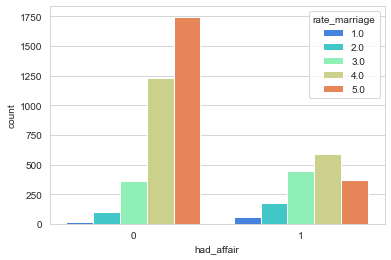

In [218]:
sns.set_style('whitegrid')
sns.countplot(x='had_affair',hue='rate_marriage',data=train_df,palette='rainbow')

<AxesSubplot:xlabel='had_affair', ylabel='count'>

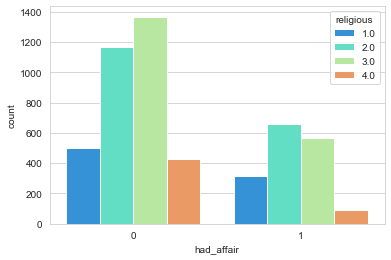

In [219]:
sns.set_style('whitegrid')
sns.countplot(x='had_affair',hue='religious',data=train_df,palette='rainbow')

<AxesSubplot:xlabel='had_affair', ylabel='count'>

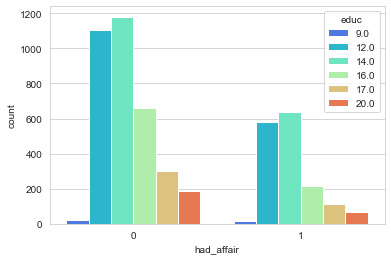

In [220]:
sns.set_style('whitegrid')
sns.countplot(x='had_affair',hue='educ',data=train_df,palette='rainbow')

<AxesSubplot:xlabel='had_affair', ylabel='count'>

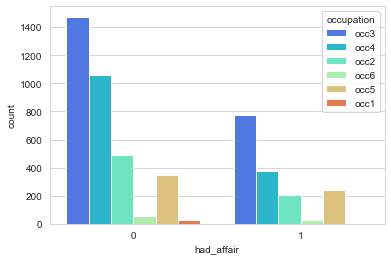

In [221]:
sns.set_style('whitegrid')
sns.countplot(x='had_affair',hue='occupation',data=train_df,palette='rainbow')

<AxesSubplot:xlabel='had_affair', ylabel='count'>

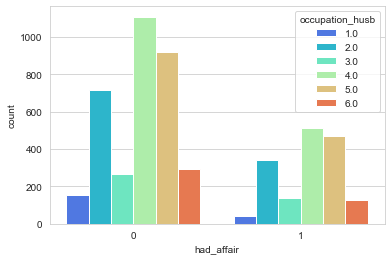

In [222]:
sns.set_style('whitegrid')
sns.countplot(x='had_affair',hue='occupation_husb',data=train_df,palette='rainbow')

6)

In [223]:
rate_marriage = pd.get_dummies(train_df['rate_marriage'],drop_first=True)
religious = pd.get_dummies(train_df['religious'],drop_first=True)
educ = pd.get_dummies(train_df['educ'],drop_first=True)
occupation = pd.get_dummies(train_df['occupation'],drop_first=True)
occupation_husb = pd.get_dummies(train_df['occupation_husb'],drop_first=True)

In [224]:
rate_marriage

,2.0,3.0,4.0,5.0
2873,0,1,0,0
1505,0,0,0,1
999,0,0,0,1
4390,0,0,0,1
1772,0,0,1,0
...,...,...,...,...
5046,0,0,0,1
5125,0,0,1,0
6393,0,0,0,1
3785,0,0,0,1


In [225]:
occupation

,occ2,occ3,occ4,occ5,occ6
2873,0,1,0,0,0
1505,0,0,1,0,0
999,0,1,0,0,0
4390,0,0,1,0,0
1772,0,0,1,0,0
...,...,...,...,...,...
5046,0,1,0,0,0
5125,0,1,0,0,0
6393,1,0,0,0,0
3785,0,1,0,0,0


7)

In [226]:
train = pd.concat([train, rate_marriage, religious, educ, occupation, occupation_husb], axis=1)
train.head()

,age,yrs_married,children,had_affair,2.0,3.0,4.0,5.0,2.0,3.0,...,occ2,occ3,occ4,occ5,occ6,2.0,3.0,4.0,5.0,6.0
2873,42.0,23.0,3.0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1505,32.0,13.0,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
999,37.0,23.0,3.0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4390,27.0,2.5,0.0,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
1772,32.0,16.5,3.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [227]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('had_affair',axis=1), 
                                                    train['had_affair'], test_size=0.30, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1046
           1       0.62      0.39      0.48       482

    accuracy                           0.73      1528
   macro avg       0.69      0.64      0.65      1528
weighted avg       0.71      0.73      0.71      1528

0.731020942408377


8)
The f1 score is 0.82 so the model is fairly good.